# MNIST - Conv2D
### Task from lecture "Machine Learning in Fundamental Physics"

The digits in the MNIST dataset are in the center.  Here we will undo this operation and comparethe performance of convolutional neural networks vs fully connected networks.

$\cdot$ Create  a  new  dataset  of  size  50x50  where  you  place  the  handwritten  digit  at  differentrandom positions in the dataset.

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout # imports our layers we want to use

from tensorflow.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical #some function for data preparation

### Define function for random placement in larger image

In [2]:
# place digit at random position in 50x50 image
def random_placement(img, x_size=50, y_size=50):
    # create empty image
    new_img = np.zeros((x_size, y_size))
    (img_x, img_y) = img.shape
    # choose random position of upper left corner while staying inside the boundaries
    (x, y) = np.random.randint(0, [x_size-img_x, y_size-img_y])
    # insert image
    new_img[x:x+img_x, y:y+img_y] = img
    return new_img

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255
x_test = x_test/255
x_train_rand = np.asarray([random_placement(img) for img in x_train])
x_test_rand = np.asarray([random_placement(img) for img in x_test])
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000, 10)


$\cdot$ Now train a neural network with a single hidden dense layer (as on the original MNISTdataset in the lectures).

In [4]:
#Neural network with single dense hidden layer

# normal MNIST
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(), metrics=['acc'])

#randomly placed digits
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=categorical_crossentropy,
              optimizer=SGD(), metrics=['acc'])

In [5]:
history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.1955 - acc: 0.7136 - val_loss: 0.6497 - val_acc: 0.8538
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5550 - acc: 0.8634 - val_loss: 0.4577 - val_acc: 0.8843
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4398 - acc: 0.8844 - val_loss: 0.3905 - val_acc: 0.8959
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3893 - acc: 0.8943 - val_loss: 0.3544 - val_acc: 0.9032
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3589 - acc: 0.9012 - val_loss: 0.3310 - val_acc: 0.9075
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3376 - acc: 0.9057 - val_loss: 0.3143 - val_acc: 0.9129
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3213 - acc: 0.9104 - val_loss: 0.3001 - val_acc: 0.9167
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.

In [6]:
history2=model2.fit(x_train_rand, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_rand, y_test))

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 2.2744 - acc: 0.1450 - val_loss: 2.2298 - val_acc: 0.1965
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1966 - acc: 0.2397 - val_loss: 2.1553 - val_acc: 0.2778
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1201 - acc: 0.3032 - val_loss: 2.0767 - val_acc: 0.3268
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 2.0397 - acc: 0.3419 - val_loss: 1.9951 - val_acc: 0.3645
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.9565 - acc: 0.3774 - val_loss: 1.9115 - val_acc: 0.3924
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8722 - acc: 0.4100 - val_loss: 1.8284 - val_acc: 0.4220
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.7884 - acc: 0.4452 - val_loss: 1.7454 - val_acc: 0.4545
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 1.

### Compare performance on regular and randomly placed MNIST

313/313 [==============================] - ETA: 0s - loss: 0.2132 - acc: 0.939 - 1s 2ms/step - loss: 0.2162 - acc: 0.9391
Test loss: 0.21617160737514496
Test accuracy: 0.9391000270843506


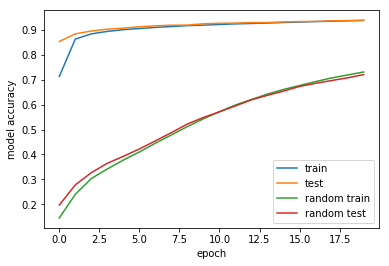

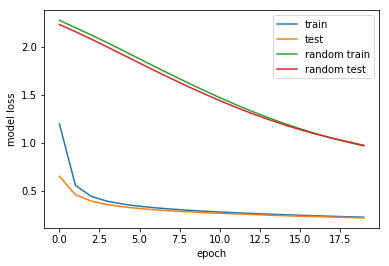

In [7]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'], label='train')
plt.plot(history1.history['val_acc'], label='test')
plt.plot(history2.history['acc'], label='random train')
plt.plot(history2.history['val_acc'], label='random test')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.plot(history2.history['loss'], label='random train')
plt.plot(history2.history['val_loss'], label='random test')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

$\cdot$ Now try to improve your performance in comparison to your previous layout by using an architecture involving convolutional layers (Conv2D).

In [8]:
# bolster input with another axis
x_train_rand = x_train_rand[..., None]
x_test_rand = x_test_rand[..., None]

In [19]:
model_conv3 = tf.keras.Sequential()

# Convolutional preprocessing
model_conv3.add(Conv2D(64, (7,7), input_shape=(50,50,1), use_bias=False))
model_conv3.add(BatchNormalization())
model_conv3.add(Activation('relu'))

model_conv3.add(MaxPooling2D(pool_size=3))

model_conv3.add(Conv2D(128, (3,3), use_bias=False))
model_conv3.add(BatchNormalization())
model_conv3.add(Activation('relu'))

model_conv3.add(MaxPooling2D(pool_size=3))

model_conv3.add(Conv2D(192, (3,3), use_bias=False))
model_conv3.add(BatchNormalization())
model_conv3.add(Activation('relu'))
model_conv3.add(Dropout(0.5))

model_conv3.add(MaxPooling2D(pool_size=2))

# Flatten to prepare for dense layers
model_conv3.add(Flatten())

# Dense postprocessing
model_conv3.add(Dense(128, use_bias=False))
model_conv3.add(BatchNormalization())
model_conv3.add(Activation('relu'))

model_conv3.add(Dense(10, activation='softmax'))

model_conv3.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model_conv3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 44, 44, 64)        3136      
_________________________________________________________________
batch_normalization_9 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73728     
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 128)       512       
_________________________________________________________________
activation_11 (Activation)   (None, 12, 12, 128)      

In [20]:
history3 = model3.fit(x_train_rand, y_train,
           batch_size=64,
           epochs=10,
           verbose=1,
           validation_data=(x_test_rand, y_test))

Epoch 1/10
938/938 [==============================] - 447s 476ms/step - loss: 2.1555 - acc: 0.2016 - val_loss: 1.8641 - val_acc: 0.3342
Epoch 2/10
938/938 [==============================] - 443s 472ms/step - loss: 1.6624 - acc: 0.4192 - val_loss: 1.4900 - val_acc: 0.4692
Epoch 3/10
938/938 [==============================] - 690s 736ms/step - loss: 1.3867 - acc: 0.5299 - val_loss: 1.2839 - val_acc: 0.5583
Epoch 4/10
938/938 [==============================] - 583s 621ms/step - loss: 1.2297 - acc: 0.5926 - val_loss: 1.1639 - val_acc: 0.6084
Epoch 5/10
938/938 [==============================] - 455s 485ms/step - loss: 1.1281 - acc: 0.6338 - val_loss: 1.0767 - val_acc: 0.6451
Epoch 6/10
938/938 [==============================] - 496s 529ms/step - loss: 1.0562 - acc: 0.6646 - val_loss: 1.0371 - val_acc: 0.6531
Epoch 7/10
938/938 [==============================] - 441s 471ms/step - loss: 1.0005 - acc: 0.6848 - val_loss: 0.9730 - val_acc: 0.6907
Epoch 8/10
938/938 [============================

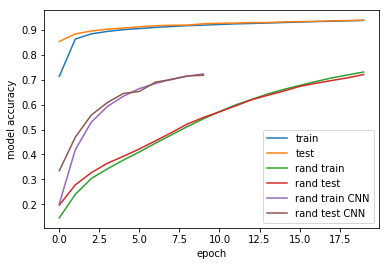

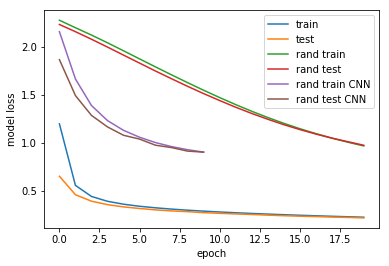

In [21]:
# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'], label='train')
plt.plot(history1.history['val_acc'], label='test')
plt.plot(history2.history['acc'], label='rand train')
plt.plot(history2.history['val_acc'], label='rand test')
plt.plot(history3.history['acc'], label='rand train CNN')
plt.plot(history3.history['val_acc'], label='rand test CNN')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.plot(history2.history['loss'], label='rand train')
plt.plot(history2.history['val_loss'], label='rand test')
plt.plot(history3.history['loss'], label='rand train CNN')
plt.plot(history3.history['val_loss'], label='rand test CNN')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()